<a href="https://colab.research.google.com/github/luisfercastilloCOL/hepatitis/blob/main/Datos_Hepatitis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Cargar Datos Hepatitis desde un repositorio en Github**

```
# Excel con los datos (Datasets)
```



In [40]:
!  git init 



Initialized empty Git repository in /content/.git/


In [41]:
! git clone https://github.com/luisfercastilloCOL/Hepatitis.git



fatal: destination path 'Hepatitis' already exists and is not an empty directory.


Verificando el directorio con los datos


In [38]:
! ls Hepatitis/


bd_hepatitis.xlsx  README.md


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import roc_auc_score

plt.style.use('ggplot')


In [3]:
from google.colab import drive

drive.mount('/content/drive',force_remount=True)

!ls /content/drive/My\ Drive/datasets/*

Mounted at /content/drive
'/content/drive/My Drive/datasets/bd_hepatitis2.xlsx'
'/content/drive/My Drive/datasets/tablaMLE.csv'


In [4]:
import pandas as pd
import io 
ruta="/content/drive/My Drive/datasets/bd_hepatitis2.xlsx"
sheet_name="hepa_Full"
df = pd.read_excel(ruta,sheet_name)

df.shape
df.columns



Index(['Clase(VoM)', 'Edad', 'Sexo', 'Esteroides', 'Antivirales', 'Fatiga',
       'Malestar', 'Anorexia', 'Higado Grande', 'Higado Firme',
       'Bazo Palpable', 'Arañas', 'Ascitas', 'Varices', 'Bilirrubina',
       'Alcalin Fosfato', 'Sgot', 'Albumina', 'Protime', 'Histologia'],
      dtype='object')

In [5]:
df.head(3)
LABELS = ["Vivo","Muerto"]

In [6]:
pd.value_counts(df['Clase(VoM)'], sort = True) #class comparison 2=muerto 1=vivo

2    67
1    13
Name: Clase(VoM), dtype: int64

In [7]:
vivo_df = df[df['Clase(VoM)'] ==1] #registros vivo


In [8]:
muerto_df = df[df['Clase(VoM)'] == 2] #casos de muerto

In [9]:
y = df['Clase(VoM)']
X = df.drop('Clase(VoM)', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)

In [12]:
X


,Edad,Sexo,Esteroides,Antivirales,Fatiga,Malestar,Anorexia,Higado Grande,Higado Firme,Bazo Palpable,Arañas,Ascitas,Varices,Bilirrubina,Alcalin Fosfato,Sgot,Albumina,Protime,Histologia
0,58,2,2,2,1,2,2,2,1,2,1,2,2,1.4,175,55,2.7,36,1
1,38,1,1,2,1,1,1,2,2,2,2,1,2,2.0,72,89,2.9,46,1
2,36,1,1,2,2,2,2,1,1,1,2,2,2,0.7,164,44,3.1,41,1
3,28,2,2,2,1,1,2,2,1,2,2,2,2,1.8,191,420,3.3,46,1
4,32,1,2,2,1,1,1,2,2,2,1,2,1,3.5,215,54,3.4,29,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,47,1,2,2,2,2,2,2,2,2,1,2,1,2.0,84,23,4.2,66,2
76,45,1,2,1,2,2,2,2,2,2,2,2,2,1.3,85,44,4.2,85,2
77,38,1,1,2,1,1,1,1,1,2,2,2,2,0.6,76,18,4.4,84,2
78,54,1,2,2,2,2,2,2,2,2,2,2,2,1.0,85,30,4.5,0,2


In [14]:
X_test

,Edad,Sexo,Esteroides,Antivirales,Fatiga,Malestar,Anorexia,Higado Grande,Higado Firme,Bazo Palpable,Arañas,Ascitas,Varices,Bilirrubina,Alcalin Fosfato,Sgot,Albumina,Protime,Histologia
53,33,1,1,2,1,1,2,2,2,2,2,1,2,0.7,63,80,3.0,31,2
34,25,2,1,1,2,2,2,2,2,2,2,2,2,0.4,45,18,4.3,70,1
51,20,1,1,2,1,1,1,2,2,2,1,1,2,1.0,160,118,2.9,23,2
42,37,1,2,2,2,2,2,2,2,2,2,2,2,0.7,26,58,4.5,100,1
79,25,1,2,2,1,2,2,1,1,1,1,1,1,1.3,181,181,4.5,57,2
6,32,1,2,1,1,2,2,2,1,2,1,2,2,1.0,59,249,3.7,54,1
24,32,1,2,2,2,2,2,2,2,2,2,2,2,0.7,102,64,4.0,90,1
23,30,1,1,2,2,2,2,2,2,2,2,2,2,0.7,100,31,4.0,100,1
30,36,1,2,2,2,2,2,2,2,2,2,2,2,0.7,62,224,4.2,100,1
44,42,1,2,2,2,2,2,2,2,2,2,2,2,0.9,60,63,4.7,47,1


In [15]:
def mostrar_resultados(y_test, pred_y):
    conf_matrix = confusion_matrix(y_test, pred_y)
    plt.figure(figsize=(8, 8))
    sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
    plt.title("Confusion matrix")
    plt.ylabel('True class')
    plt.xlabel('Predicted class')
    plt.show()
    print (classification_report(y_test, pred_y))

In [16]:
def run_model_balanced(X_train, X_test, y_train, y_test):
    clf = LogisticRegression(C=1.0,penalty='l2',random_state=1,solver="newton-cg",class_weight="balanced")
    clf.fit(X_train, y_train)
    return clf

model = run_model_balanced(X_train, X_test, y_train, y_test)

In [17]:
from sklearn.ensemble import RandomForestClassifier

# Crear el modelo con 100 arboles
model = RandomForestClassifier(n_estimators=100, 
                               bootstrap = True,verbose=2,
                               max_features = 'sqrt')
# entrenar!
model.fit(X_train, y_train)

building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
b

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=2, warm_start=False)

In [18]:
pred_y = model.predict(X_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


In [19]:
y_test

53    1
34    2
51    2
42    2
79    2
6     2
24    2
23    2
30    2
44    2
48    1
60    1
50    1
67    2
29    2
28    2
22    2
78    2
18    2
70    2
62    1
36    2
69    2
4     2
Name: Clase(VoM), dtype: int64

In [117]:
pred_y

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1,
       2, 2])

In [20]:
conf_matrix = confusion_matrix(y_test, pred_y)

In [21]:
conf_matrix

array([[ 2,  3],
       [ 1, 18]])

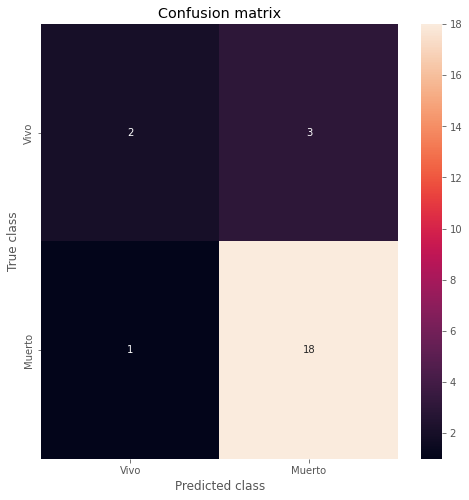

              precision    recall  f1-score   support

           1       0.67      0.40      0.50         5
           2       0.86      0.95      0.90        19

    accuracy                           0.83        24
   macro avg       0.76      0.67      0.70        24
weighted avg       0.82      0.83      0.82        24



In [22]:
mostrar_resultados(y_test, pred_y)

**Curva ROC**

In [23]:
roc_value = roc_auc_score(y_test, pred_y)
print(roc_value)

0.6736842105263158


**Probamos con Random Forest**
ATENCION: Este modelo toma algo más de tiempo en entrenar

In [24]:
# Crear el modelo con 100 arboles
model = RandomForestClassifier(n_estimators=100, 
                               bootstrap = True,verbose=2,
                               max_features = 'sqrt')
# entrenar!
model.fit(X_train, y_train)

building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
b

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.2s finished


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=2, warm_start=False)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


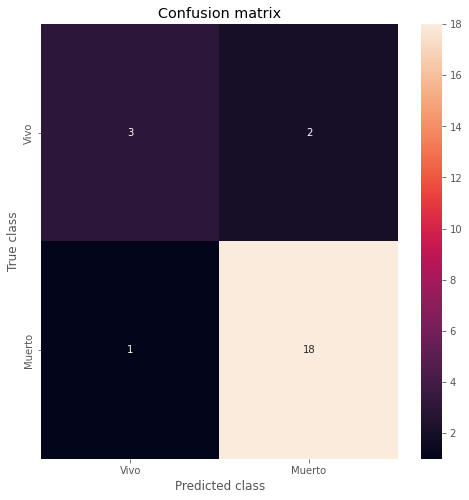

              precision    recall  f1-score   support

           1       0.75      0.60      0.67         5
           2       0.90      0.95      0.92        19

    accuracy                           0.88        24
   macro avg       0.82      0.77      0.79        24
weighted avg       0.87      0.88      0.87        24



In [25]:
pred_y = model.predict(X_test)
mostrar_resultados(y_test, pred_y)

**Curva ROC**

In [26]:
roc_value = roc_auc_score(y_test, pred_y)
print(roc_value)

0.7736842105263158


**Otro Bosque:** Random Forest -más veloz-

In [27]:
model = RandomForestClassifier(n_estimators=100, class_weight="balanced",
                               max_features = 'sqrt', verbose=2, max_depth=6,
                               oob_score=True, random_state=50)
# a entrenar
model.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.2s finished


building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
b

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=6, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=True, random_state=50, verbose=2,
                       warm_start=False)

**Resultados**

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


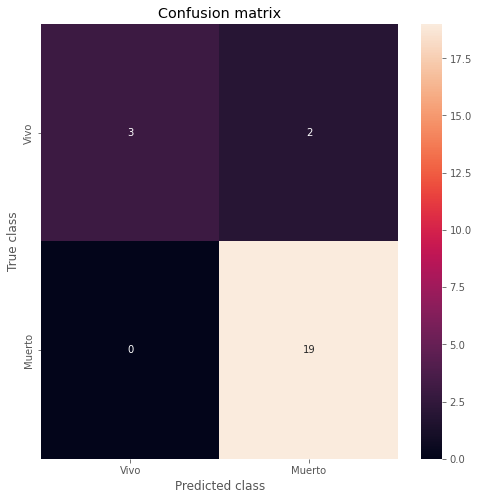

              precision    recall  f1-score   support

           1       1.00      0.60      0.75         5
           2       0.90      1.00      0.95        19

    accuracy                           0.92        24
   macro avg       0.95      0.80      0.85        24
weighted avg       0.92      0.92      0.91        24



In [28]:
pred_y = model.predict(X_test)
mostrar_resultados(y_test, pred_y)

** Curva ROC**

In [29]:

# Calculate roc auc
roc_value = roc_auc_score(y_test, pred_y)
print(roc_value)

0.8


In [39]:
# 5 ML Alg RandomForest, NaibeBayes, KNN, Logistic Regression, Support Vector Class
rf = RandomForestClassifier()
nb = MultinomialNB()
knn = KNeighborsClassifier()
lgr = LogisticRegression(multi_class='multinomial')
svc = SVC(C=1,kernel="linear",gamma=2)

In [ ]:
# Cross Validation using 4 Algorithms, with 2 K for CV Folds
classifiers = [rf, nb, knn, lgr, svc]
scores = np.array([])
k = 5
for clf in classifiers:
    scores = np.append(scores, cross_val_score(clf, X, y, cv=k)[:])
classifier_labels = []
for label in ['RF', 'NB', 'KNN', 'LGR', 'SVM']:
    classifier_labels += [label] * k